In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings as war
war.filterwarnings("ignore")
sb.set(color_codes=True)
sb.set(rc={'figure.figsize':(11.7,8.27)})

## Data Collection

In [2]:
train=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
train.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Cleaning

In [3]:
train.lt(0).any()

ID                    False
Age                   False
Experience             True
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [4]:
## Experience field have some negative values

In [5]:
train.loc[train['Experience']<0,'Experience']=0
train.lt(0).any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [6]:
train.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
## Dataset has no NaN values

## Exploratory Data Analysis

In [8]:
train.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


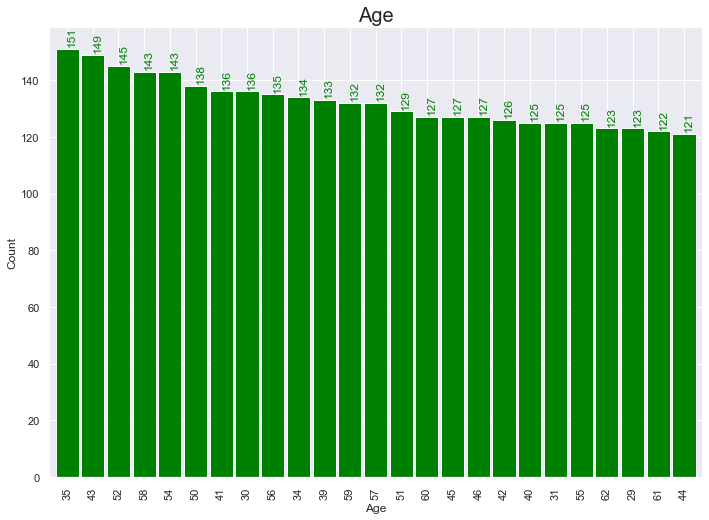

In [9]:
s=train['Age'].value_counts().head(25)
ax=s.plot.bar(width=.9,color="Green") 
plt.title("Age",size=20)
plt.xlabel("Age")
plt.ylabel("Count")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Age + 1.5, v.Age, color='green',rotation=90)

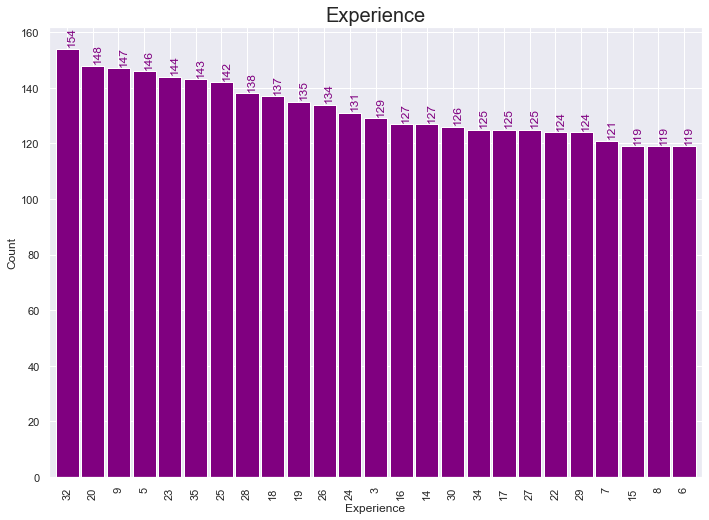

In [10]:
s=train['Experience'].value_counts().head(25)
ax=s.plot.bar(width=.9,color="Purple") 
plt.title("Experience",size=20)
plt.xlabel("Experience")
plt.ylabel("Count")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Experience + 1.5, v.Experience, color='Purple',rotation=90)

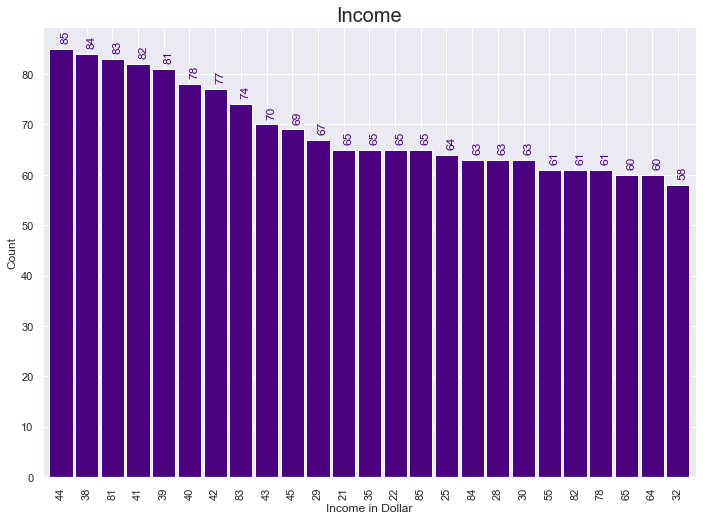

In [11]:
s=train['Income'].value_counts().head(25)
ax=s.plot.bar(width=.9,color="Indigo") 
plt.title("Income",size=20)
plt.xlabel("Income in Dollar")
plt.ylabel("Count")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Income + 1.5, v.Income, color='Indigo',rotation=90)

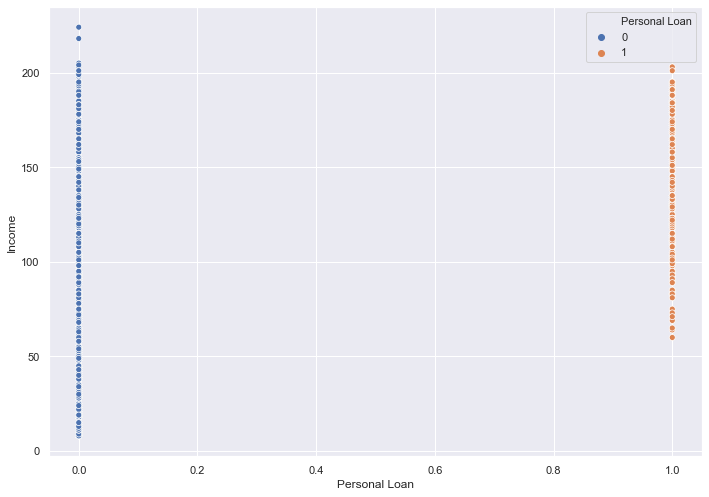

In [12]:
sb.scatterplot(x="Personal Loan",y="Income",data=train,hue="Personal Loan")

In [13]:
maxii=train.loc[(train['Personal Loan']==1),'Income'].max()
minii=train.loc[(train['Personal Loan']==1),'Income'].min()
print(maxii)
print(minii)

203
60


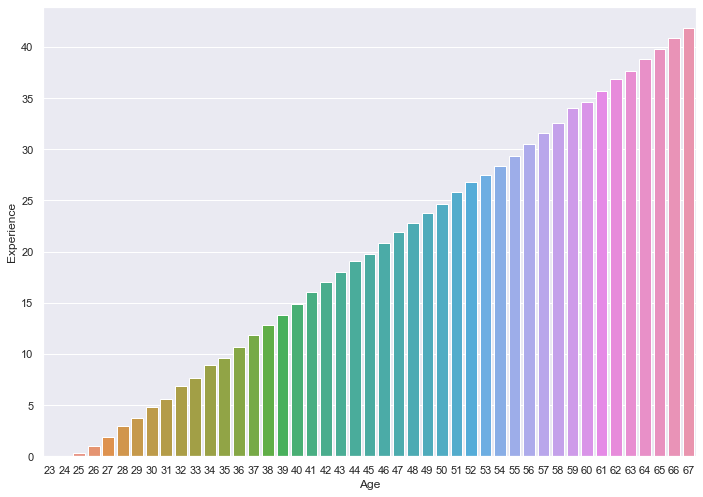

In [14]:
sb.barplot(x="Age",y="Experience",data=train,ci=None)

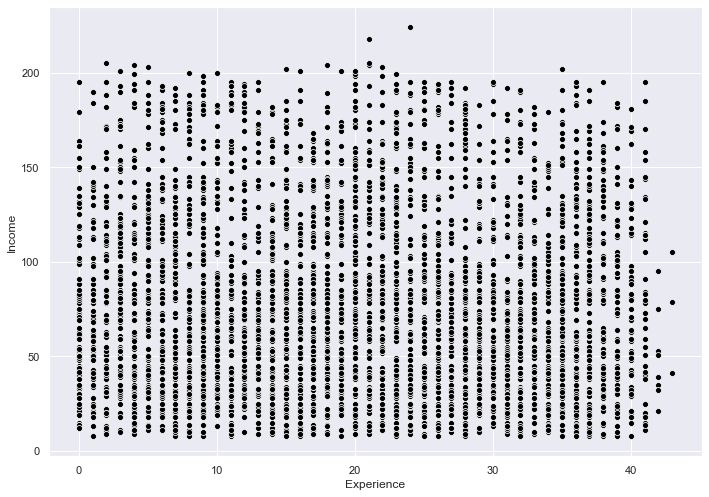

In [15]:
sb.scatterplot(x="Experience",y="Income",data=train,color='black')

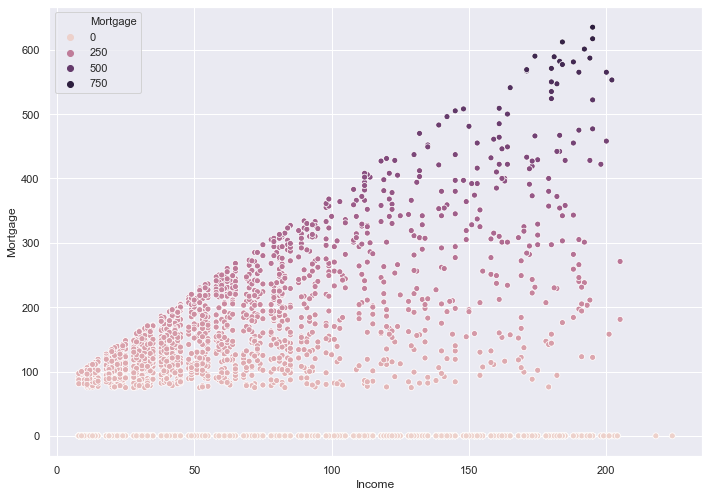

In [16]:
sb.scatterplot(x="Income",y="Mortgage",hue="Mortgage",data=train)

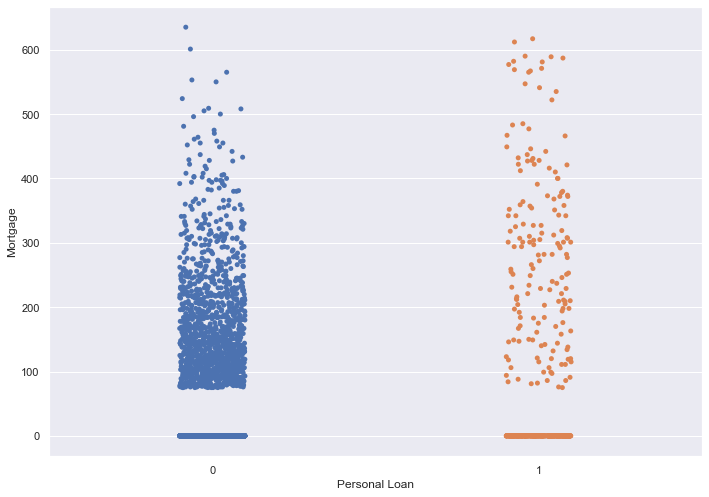

In [17]:
sb.stripplot(y="Mortgage",x="Personal Loan",data=train)

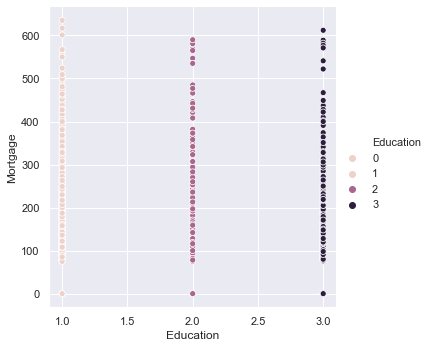

In [18]:
sb.relplot(x="Education",y="Mortgage",data=train,hue="Education")

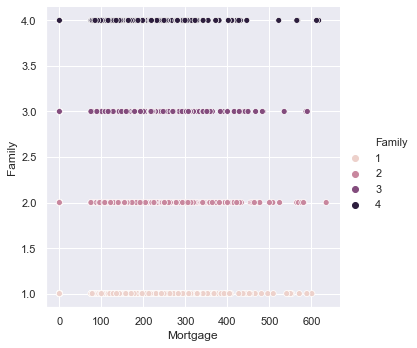

In [19]:
sb. relplot(x="Mortgage",y="Family",data=train,hue="Family")

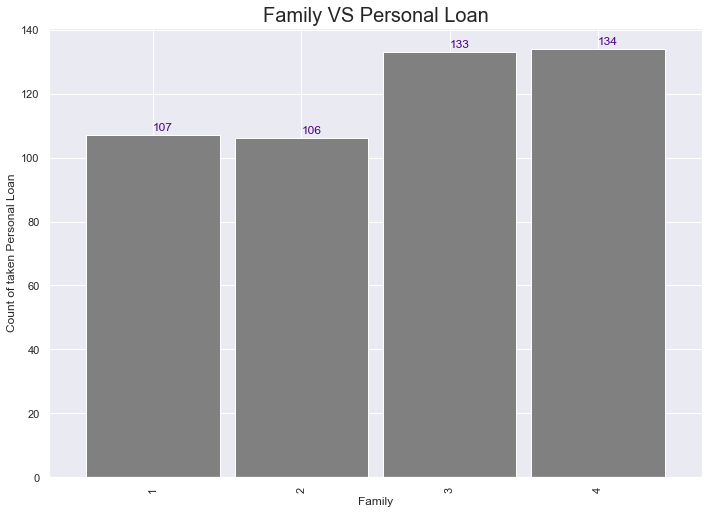

In [20]:
s=train.Family[train['Personal Loan']==1].value_counts().sort_index()
#ax=plot(kind='bar',alpha=0.5,color="Orange")
ax=s.plot.bar(width=.9,color="Gray") 
plt.title("Family VS Personal Loan",size=20)
plt.xlabel("Family")
plt.ylabel("Count of taken Personal Loan")
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Family + 1.5, v.Family, color='Indigo')

In [21]:
train['Active']=0

In [22]:
train.loc[((train['Securities Account']==1)|(train['CD Account']==1)|(train['Online']==1)|(train['CreditCard']==1)),'Active']=1

In [23]:
train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Active
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1


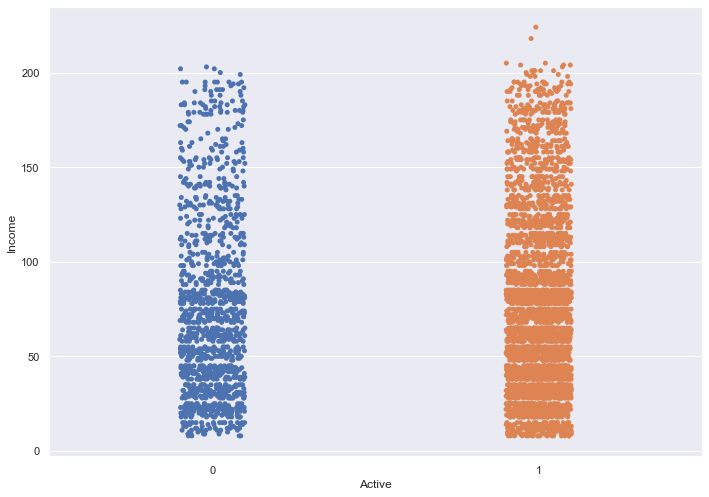

In [24]:
sb.stripplot(y="Income",x="Active",data=train)

In [25]:
## We can see that 3,4 family size are above average. So we can assume that maximum response will be coming from these twos.

In [26]:
train['Active'].sum()

3716

In [27]:
train['Response']=0

In [28]:
train.loc[((train['Family']==3)|(train['Family']==4)),'Response']=1
train.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Active,Response
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,1
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,0
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,1
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,0


In [29]:
## We can also add response of those who did response in last personal loan campaign.

In [30]:
## Now we will do the IQR range query for finding the ourliers of mortgage (Those did not response to last personal loan campaign but took mortgage. And we can't ignore them fully).

In [31]:
test=pd.DataFrame(train.loc[(((train['Family']==1)|(train['Family']==2))&(train['Mortgage']!=0)),'Mortgage'])

In [32]:
test.head()

,Mortgage
22,260
23,163
24,159
30,122
32,193


In [33]:
test.shape

(859, 1)

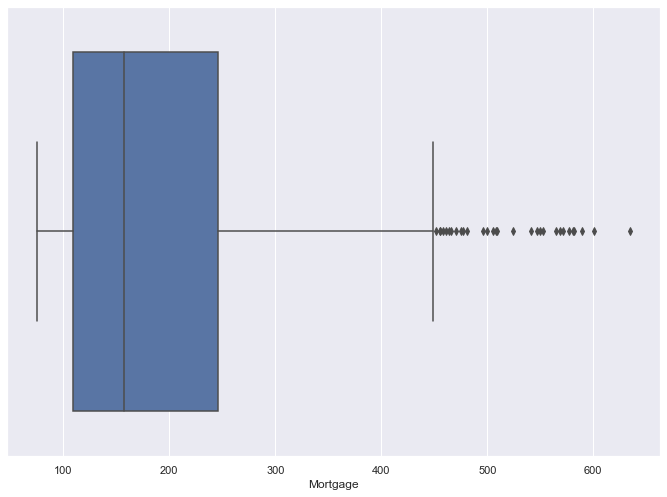

In [34]:
sb.boxplot(x=test['Mortgage'])

In [35]:
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1
print(IQR) 

Mortgage    136.5
dtype: float64


In [36]:
test = test[~((test < (Q1-1.5 * IQR)) |(test > (Q3 + 1.5 * IQR))).any(axis=1)]

In [37]:
test.shape

(829, 1)

In [38]:
first=Q1-1.5 * IQR
second=Q3 + 1.5 * IQR

In [39]:
print(first)
print(second)

Mortgage   -95.75
dtype: float64
Mortgage    450.25
dtype: float64


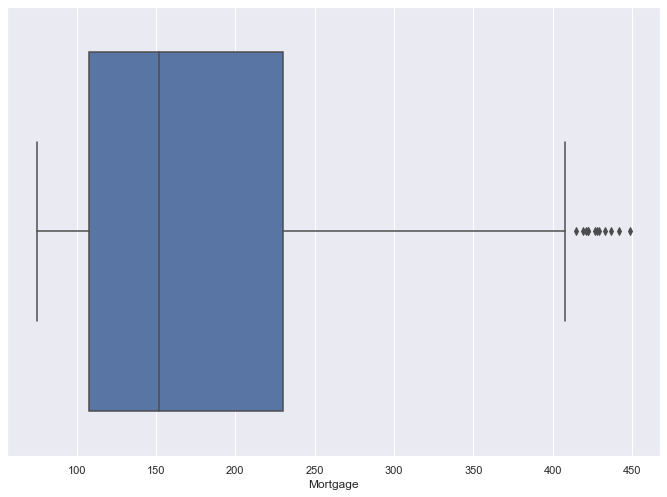

In [40]:
## After removing some outliers
sb.boxplot(x=test['Mortgage'])

In [41]:
train.loc[((train['Mortgage']==0)&(train['Active']==1)),'Response']=1
train.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Active,Response
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,1
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,1
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,1
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,0


In [42]:
train.loc[(((train['Family']==1)&(train['Family']==2))&((train['Mortgage']>=second[0])&(train['Mortgage']<=first[0]))),'Response']=1

In [43]:
train.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Active,Response
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,1
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,1
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,1
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,0


In [44]:
train['Mon_Income']=(train['Income']/12.0)

In [45]:
train.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Active,Response,Mon_Income
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,1,4.083333
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1,2.833333
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0,0.916667
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0,8.333333
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,1,3.750000
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,1,2.416667
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,1,6.000000
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,1,1.833333
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,1,6.750000
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,0,15.000000


In [46]:
train['Ultimate']=(train['Mon_Income']-train['CCAvg'])

In [47]:
train.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Active,Response,Mon_Income,Ultimate
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,1,4.083333,2.483333
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1,2.833333,1.333333
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0,0.916667,-0.083333
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0,8.333333,5.633333
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,1,3.750000,2.750000
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,1,2.416667,2.016667
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,1,6.000000,4.500000
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,1,1.833333,1.533333
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,1,6.750000,6.150000
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,0,15.000000,6.100000


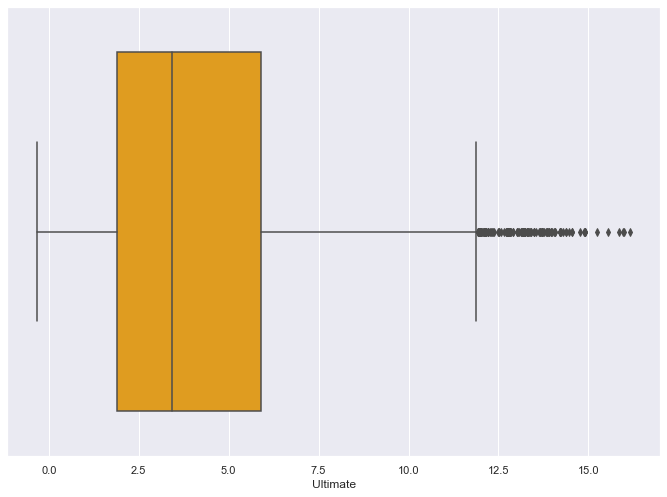

In [48]:
sb.boxplot(x=train['Ultimate'],color='orange')

In [49]:
train['Ultimate'].shape

(5000,)

In [50]:
(train['Response']>0).sum()

3640

In [51]:
tesst=pd.DataFrame(train['Ultimate'])

In [52]:
Q1 = tesst.quantile(0.25)
Q3 = tesst.quantile(0.75)
IQR = Q3 - Q1
print(IQR) 

Ultimate    4.0
dtype: float64


In [53]:
tesst = tesst[~((tesst < (Q1-1.5 * IQR)) |(tesst > (Q3 + 1.5 * IQR))).any(axis=1)]
tesst.head(10)

,Ultimate
0,2.483333
1,1.333333
2,-0.083333
3,5.633333
4,2.750000
5,2.016667
6,4.500000
7,1.533333
8,6.150000
9,6.100000


In [54]:
fifi=tesst['Ultimate'].max()
sisi=tesst['Ultimate'].min()

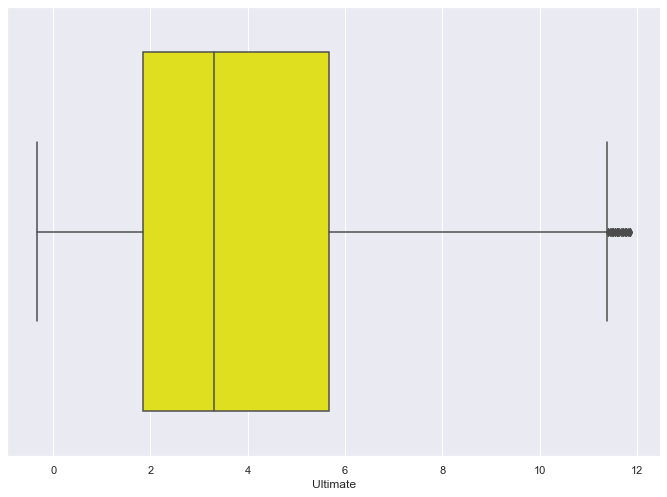

In [55]:
## After removing some outliers
sb.boxplot(x=tesst['Ultimate'],color='yellow')

In [56]:
tesst.shape

(4872, 1)

In [57]:
train.loc[((train['Ultimate']>=fifi)&(train['Ultimate']<=sisi)),'Response']=1

In [58]:
train.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Active,Response,Mon_Income,Ultimate
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,1,4.083333,2.483333
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1,2.833333,1.333333
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0,0.916667,-0.083333
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0,8.333333,5.633333
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,1,3.750000,2.750000
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,1,2.416667,2.016667
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,1,6.000000,4.500000
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,1,1.833333,1.533333
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,1,6.750000,6.150000
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,0,15.000000,6.100000


In [59]:
(train['Response']>0).sum()

3640

   Response  Count
0         0   1360
1         1   3640
[0, 1]
[1360, 3640]
5000
[27.200000000000003, 72.8]


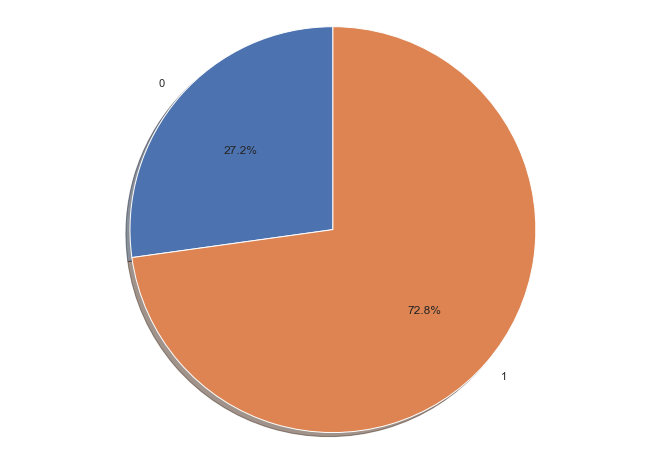

In [60]:

sizes_ = train.groupby(['Response']).size().reset_index(name='Count')
print(sizes_)

labels_ = sizes_['Response'].to_list()
print(labels_)

counter_ = sizes_['Count'].to_list()
print(counter_)
total = sum([int(v) for v in counter_])
print(total)
perchange = [(v/total)*100 for v in counter_]
print(perchange)
fig, ax1 = plt.subplots()
ax1.pie(perchange,labels=labels_,autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [61]:
new_train=train.copy()

In [62]:
new_train.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Active,Response,Mon_Income,Ultimate
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,1,4.083333,2.483333
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,1,2.833333,1.333333
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,0,0.916667,-0.083333
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0,8.333333,5.633333
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,1,3.750000,2.750000
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,1,2.416667,2.016667
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,1,1,6.000000,4.500000
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,1,1,1.833333,1.533333
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,1,6.750000,6.150000
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,0,15.000000,6.100000


In [63]:
new_train=new_train.drop(['Experience','Age','ZIP Code','Personal Loan','Securities Account','CD Account','Online','CreditCard','Education'],axis=1).copy()

In [64]:
new_train.head()

,ID,Income,Family,CCAvg,Mortgage,Active,Response,Mon_Income,Ultimate
0,1,49,4,1.6,0,1,1,4.083333,2.483333
1,2,34,3,1.5,0,1,1,2.833333,1.333333
2,3,11,1,1.0,0,0,0,0.916667,-0.083333
3,4,100,1,2.7,0,0,0,8.333333,5.633333
4,5,45,4,1.0,0,1,1,3.750000,2.750000


In [65]:
search=new_train['Response']
new_train=new_train.drop(['Response'],axis=1)

In [66]:
new_train.head()

,ID,Income,Family,CCAvg,Mortgage,Active,Mon_Income,Ultimate
0,1,49,4,1.6,0,1,4.083333,2.483333
1,2,34,3,1.5,0,1,2.833333,1.333333
2,3,11,1,1.0,0,0,0.916667,-0.083333
3,4,100,1,2.7,0,0,8.333333,5.633333
4,5,45,4,1.0,0,1,3.750000,2.750000


In [67]:
new_train=new_train.drop(['ID'],axis=1)

In [68]:
new_train.head()

,Income,Family,CCAvg,Mortgage,Active,Mon_Income,Ultimate
0,49,4,1.6,0,1,4.083333,2.483333
1,34,3,1.5,0,1,2.833333,1.333333
2,11,1,1.0,0,0,0.916667,-0.083333
3,100,1,2.7,0,0,8.333333,5.633333
4,45,4,1.0,0,1,3.750000,2.750000


In [69]:
new_train=new_train.drop(['Active','CCAvg','Mon_Income'],axis=1)

In [70]:
new_train.head()

,Income,Family,Mortgage,Ultimate
0,49,4,0,2.483333
1,34,3,0,1.333333
2,11,1,0,-0.083333
3,100,1,0,5.633333
4,45,4,0,2.750000
